## Machine Learning Part 2 - Unsupervised Machine Learning

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\guzic\Contacts\Baseball Analysis'

In [4]:
# dataset import

bb = pd.read_csv(os.path.join(path, '02 Data', 'Prepped Data', 'CLEANED Baseball Hitter.csv'), index_col = False)

In [5]:
bb.shape

(119060, 27)

In [6]:
bb.head()

,Unnamed: 0,name,url,Year,Age,Team,League,Games,Plate Appearances,At Bats,...,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging,Total Bases,Pos,Awards,team_city_code,state_name,Runs Range
0,0,Henry Aaron,/players/a/aaronha01.shtml,1954,20,MLN,NL,122.0,509.0,468.0,...,0.280,0.322,0.447,0.769,209.0,*79/H,RoY-4,MLN,not a current major league USA team,High Runs
1,1,Henry Aaron,/players/a/aaronha01.shtml,1955,21,MLN,NL,153.0,665.0,602.0,...,0.314,0.366,0.540,0.906,325.0,*974/H,"AS,MVP-9",MLN,not a current major league USA team,High Runs
2,2,Henry Aaron,/players/a/aaronha01.shtml,1956,22,MLN,NL,153.0,660.0,609.0,...,0.328,0.365,0.558,0.923,340.0,*9/H,"AS,MVP-3",MLN,not a current major league USA team,High Runs
3,3,Henry Aaron,/players/a/aaronha01.shtml,1957,23,MLN,NL,151.0,675.0,615.0,...,0.322,0.378,0.600,0.978,369.0,*98/H,"AS,MVP-1",MLN,not a current major league USA team,High Runs
4,4,Henry Aaron,/players/a/aaronha01.shtml,1958,24,MLN,NL,153.0,664.0,601.0,...,0.326,0.386,0.546,0.931,328.0,*98,"AS,MVP-3,GG",MLN,not a current major league USA team,High Runs


In [7]:
# dropping Unnamed: columns

bb = bb.drop(columns = 'Unnamed: 0')

In [8]:
bb.head()

,name,url,Year,Age,Team,League,Games,Plate Appearances,At Bats,Runs,...,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging,Total Bases,Pos,Awards,team_city_code,state_name,Runs Range
0,Henry Aaron,/players/a/aaronha01.shtml,1954,20,MLN,NL,122.0,509.0,468.0,58.0,...,0.280,0.322,0.447,0.769,209.0,*79/H,RoY-4,MLN,not a current major league USA team,High Runs
1,Henry Aaron,/players/a/aaronha01.shtml,1955,21,MLN,NL,153.0,665.0,602.0,105.0,...,0.314,0.366,0.540,0.906,325.0,*974/H,"AS,MVP-9",MLN,not a current major league USA team,High Runs
2,Henry Aaron,/players/a/aaronha01.shtml,1956,22,MLN,NL,153.0,660.0,609.0,106.0,...,0.328,0.365,0.558,0.923,340.0,*9/H,"AS,MVP-3",MLN,not a current major league USA team,High Runs
3,Henry Aaron,/players/a/aaronha01.shtml,1957,23,MLN,NL,151.0,675.0,615.0,118.0,...,0.322,0.378,0.600,0.978,369.0,*98/H,"AS,MVP-1",MLN,not a current major league USA team,High Runs
4,Henry Aaron,/players/a/aaronha01.shtml,1958,24,MLN,NL,153.0,664.0,601.0,109.0,...,0.326,0.386,0.546,0.931,328.0,*98,"AS,MVP-3,GG",MLN,not a current major league USA team,High Runs


In [9]:
bb.columns

Index(['name', 'url', 'Year', 'Age', 'Team', 'League', 'Games',
       'Plate Appearances', 'At Bats', 'Runs', 'Hits', 'Double', 'Triple',
       'Home Run', 'Runs Batted In', 'Walk', 'Batting Average',
       'On Base Percentage', 'Slugging Percentage', 'On Base Plus Slugging',
       'Total Bases', 'Pos', 'Awards', 'team_city_code', 'state_name',
       'Runs Range'],
      dtype='object')

In [10]:
# creating dataset for just numerical data to use for analysis: 

bb3 = bb.drop(columns = ['name', 'url', 'Age', 'Team', 'League', 'Pos', 'Awards', 'team_city_code', 'state_name', 'Runs Range'])

In [11]:
bb3.head()

,Year,Games,Plate Appearances,At Bats,Runs,Hits,Double,Triple,Home Run,Runs Batted In,Walk,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging,Total Bases
0,1954,122.0,509.0,468.0,58.0,131.0,27.0,6.0,13.0,69.0,28.0,0.280,0.322,0.447,0.769,209.0
1,1955,153.0,665.0,602.0,105.0,189.0,37.0,9.0,27.0,106.0,49.0,0.314,0.366,0.540,0.906,325.0
2,1956,153.0,660.0,609.0,106.0,200.0,34.0,14.0,26.0,92.0,37.0,0.328,0.365,0.558,0.923,340.0
3,1957,151.0,675.0,615.0,118.0,198.0,27.0,6.0,44.0,132.0,57.0,0.322,0.378,0.600,0.978,369.0
4,1958,153.0,664.0,601.0,109.0,196.0,34.0,4.0,30.0,95.0,59.0,0.326,0.386,0.546,0.931,328.0


### The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(bb3).score(bb3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-11045958655.881027,
 -2796825768.2762246,
 -1415309138.8406434,
 -942074448.3700582,
 -719799769.9084251,
 -591435628.5912226,
 -515205596.32231456,
 -465261803.85192776,
 -431893214.873542]

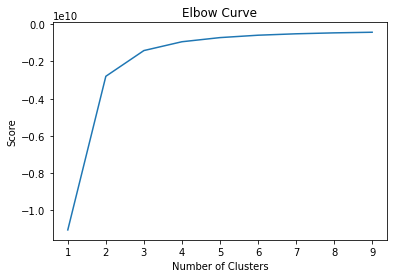

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  There appears to be 3 curves. Since there is 3 curves, we will use 3 k-means clusters.

### k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [16]:
# Fit the k-means object to the data.

kmeans.fit(bb3)

C:\Users\guzic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [17]:
bb3['clusters'] = kmeans.fit_predict(bb3)

C:\Users\guzic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [18]:
bb3.head()

,Year,Games,Plate Appearances,At Bats,Runs,Hits,Double,Triple,Home Run,Runs Batted In,Walk,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging,Total Bases,clusters
0,1954,122.0,509.0,468.0,58.0,131.0,27.0,6.0,13.0,69.0,28.0,0.280,0.322,0.447,0.769,209.0,2
1,1955,153.0,665.0,602.0,105.0,189.0,37.0,9.0,27.0,106.0,49.0,0.314,0.366,0.540,0.906,325.0,2
2,1956,153.0,660.0,609.0,106.0,200.0,34.0,14.0,26.0,92.0,37.0,0.328,0.365,0.558,0.923,340.0,2
3,1957,151.0,675.0,615.0,118.0,198.0,27.0,6.0,44.0,132.0,57.0,0.322,0.378,0.600,0.978,369.0,2
4,1958,153.0,664.0,601.0,109.0,196.0,34.0,4.0,30.0,95.0,59.0,0.326,0.386,0.546,0.931,328.0,2


In [19]:
bb3['clusters'].value_counts()

1    45785
2    37371
0    35904
Name: clusters, dtype: int64

In [20]:
bb3.columns

Index(['Year', 'Games', 'Plate Appearances', 'At Bats', 'Runs', 'Hits',
       'Double', 'Triple', 'Home Run', 'Runs Batted In', 'Walk',
       'Batting Average', 'On Base Percentage', 'Slugging Percentage',
       'On Base Plus Slugging', 'Total Bases', 'clusters'],
      dtype='object')

In [37]:
# Exporting bb3 as its own excel for final data dashboard

bb3.to_csv(os.path.join(path, '02 Data','Prepped Data', 'Good CLUSTER Baseball Data.csv'))

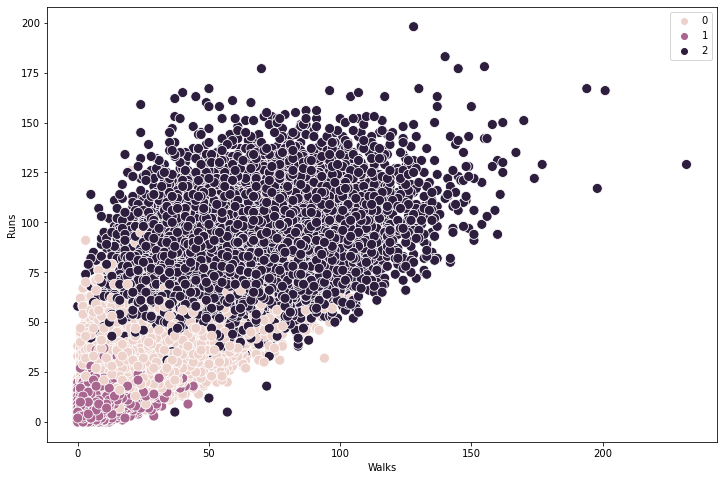

In [21]:
# Plot the clusters for the "Walks" and "Runs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['Walk'], y=bb3['Runs'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Walks') # Label x-axis.
plt.ylabel('Runs') # Label y-axis.
plt.show()

#### The dark purple or number two cluster seems to have the most amounts of values. It seems the higher the amount of walks, the higher the amount of runs.

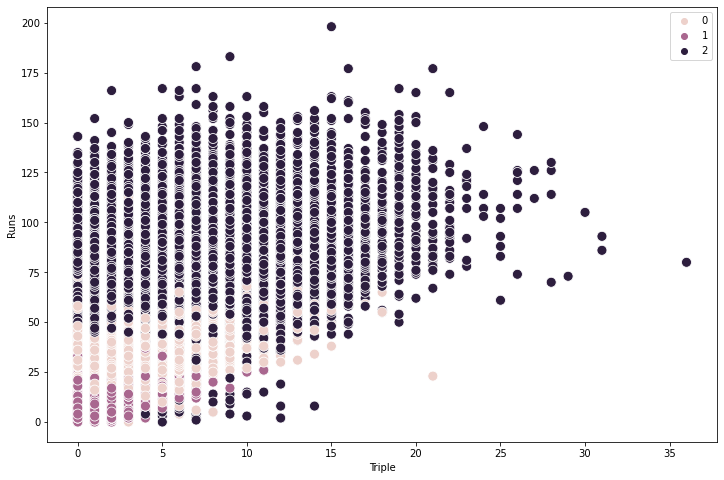

In [22]:
# Plot the clusters for the "Triples" and "Runs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['Triple'], y=bb3['Runs'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Triple') # Label x-axis.
plt.ylabel('Runs') # Label y-axis.
plt.show()

#### The purple, or number two, cluster has the higher amount of values. The pink and purple values do not exceed 70 runs. I think this could mean that a triple does not necessarly lead to a run. 

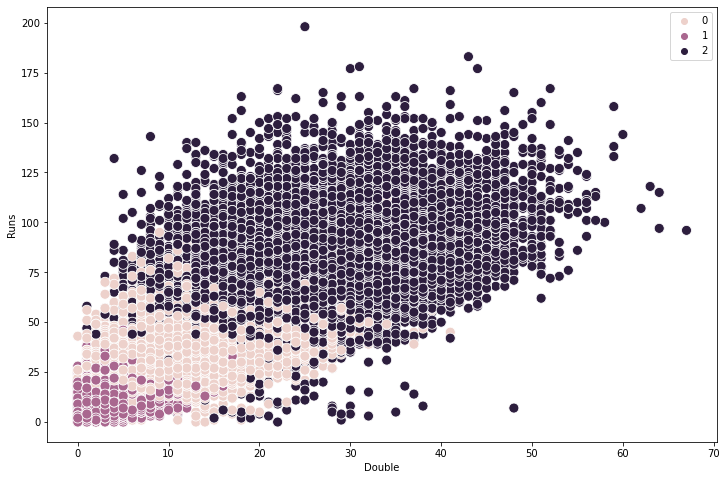

In [23]:
# Plot the clusters for the "Doubles" and "Runs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['Double'], y=bb3['Runs'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Double') # Label x-axis.
plt.ylabel('Runs') # Label y-axis.
plt.show()

#### The dark purple, or number two, cluster has the higher amount of values. The pink and purple values do not exceed 90 runs. There is a high range of dark purple values.

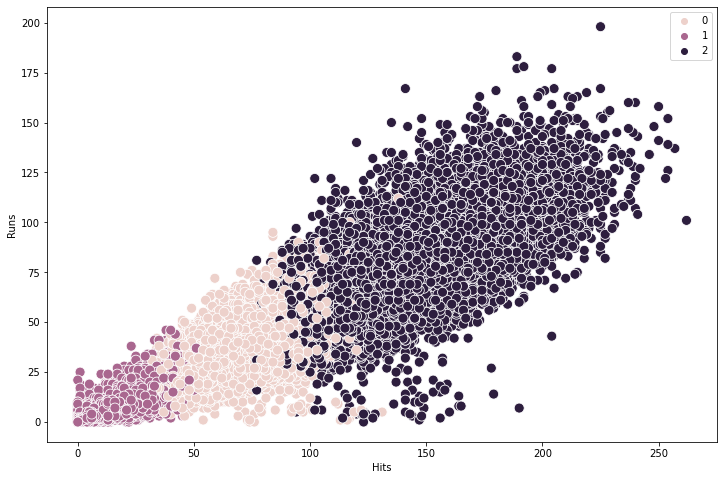

In [24]:
# Plot the clusters for the "Hits" and "Runs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['Hits'], y=bb3['Runs'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Hits') # Label x-axis.
plt.ylabel('Runs') # Label y-axis.
plt.show()

#### The dark purple, or number two, cluster has the higher amount of values. It looks like once a player hits 100 hits, their runs seem to continue to increase. More hits does not nescessarly mean more runs. There are several number of low run amounts in the 100-150 hit range. 

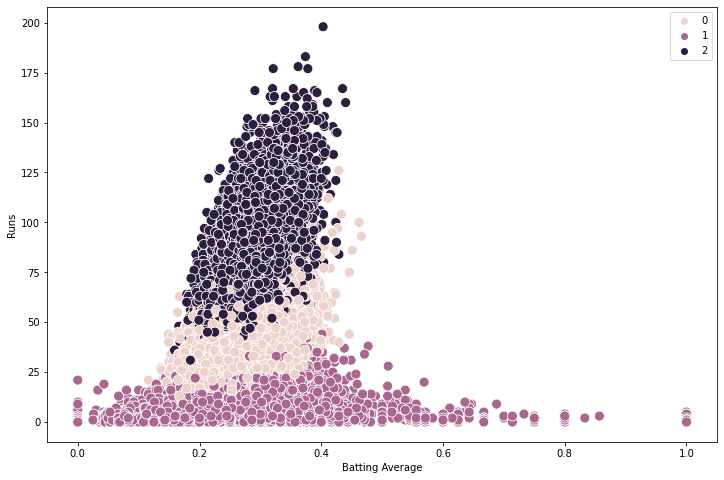

In [25]:
# Plot the clusters for the "Batting Average" and "Runs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['Batting Average'], y=bb3['Runs'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Batting Average') # Label x-axis.
plt.ylabel('Runs') # Label y-axis.
plt.show()

#### The dark purple, or number two, cluster has the higher amount of values. The purple values are interesting. Either a very low or very high batting average has the lowest amount of runs. The number of runs increase as the batting average goes between 200 and to almost 400 and then once it hits about 380-400, the number of runs start to decrease.

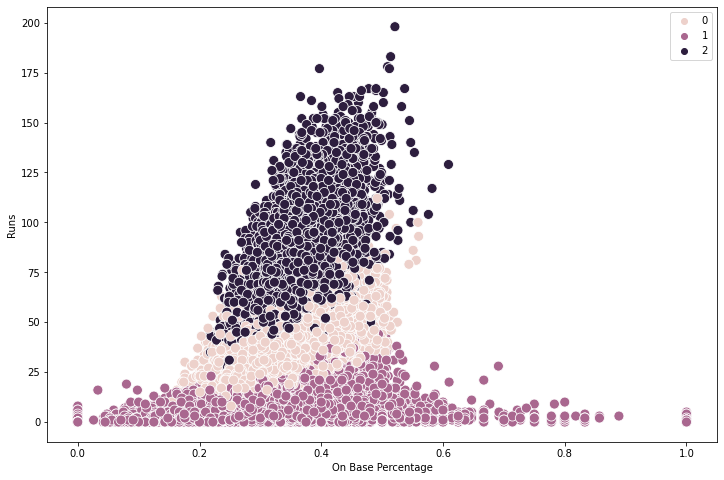

In [26]:
# Plot the clusters for the "On Base Percentage" and "Runs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['On Base Percentage'], y=bb3['Runs'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('On Base Percentage') # Label x-axis.
plt.ylabel('Runs') # Label y-axis.
plt.show()

#### The dark purple, or number two, cluster has the higher amount of values. The purple values are interesting. Either a very low or very high one base percentage has the lowest amount of runs. The number of runs increase as the batting average goes between 200 and to almost 600 and then once it hits about 580-600, the number of runs start to decrease.

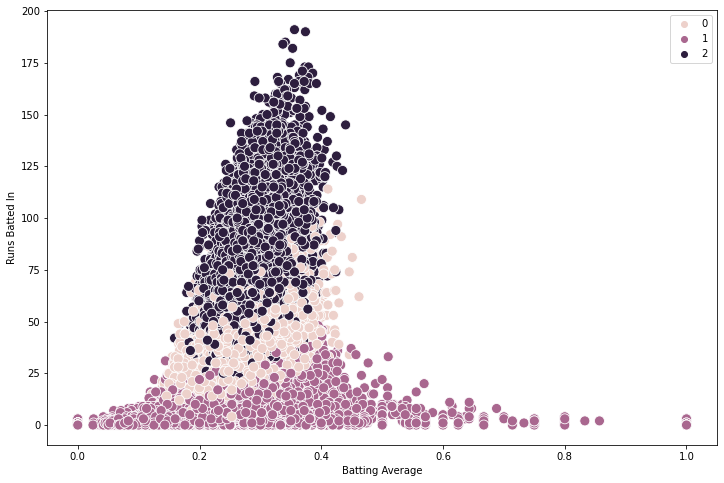

In [27]:
# Plot the clusters for the "Runs Batted In" and "Batting Average" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['Batting Average'], y=bb3['Runs Batted In'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Batting Average') # Label x-axis.
plt.ylabel('Runs Batted In') # Label y-axis.
plt.show()

#### The dark purple, or number two, cluster has the higher amount of values. The purple values are interesting. Either a very low or very high batting average has the lowest amount of runs batted in. The number of runs increase as the batting average goes between 175 and to almost 420 and then once it hits about 400-420, the number of runs batted in start to decrease.

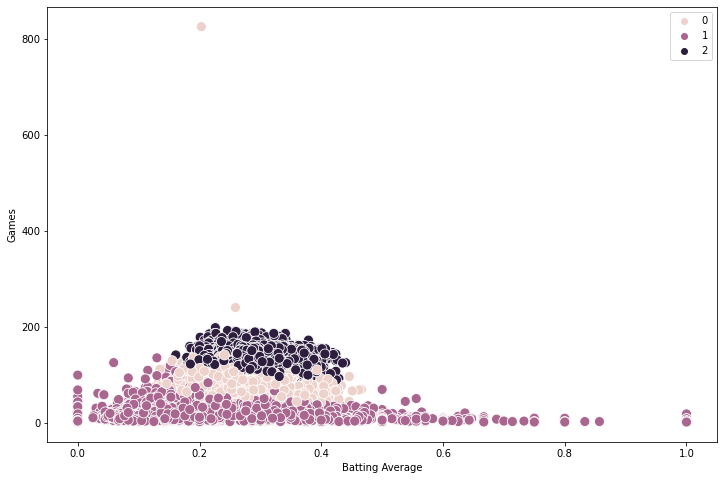

In [28]:
# Plot the clusters for the "Batting Average" and "Games" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['Batting Average'], y=bb3['Games'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Batting Average') # Label x-axis.
plt.ylabel('Games') # Label y-axis.
plt.show()

#### The purple, or number one, cluster seems has the higher amount of values. The purple values are also interesting. Either a very low or very high batting average has the lowest amount of games. The number of games increasese as batting average incrases up until about 200 games and then batting average starts to go back down. There does seem to be a potential extreme value of over 800 games. 

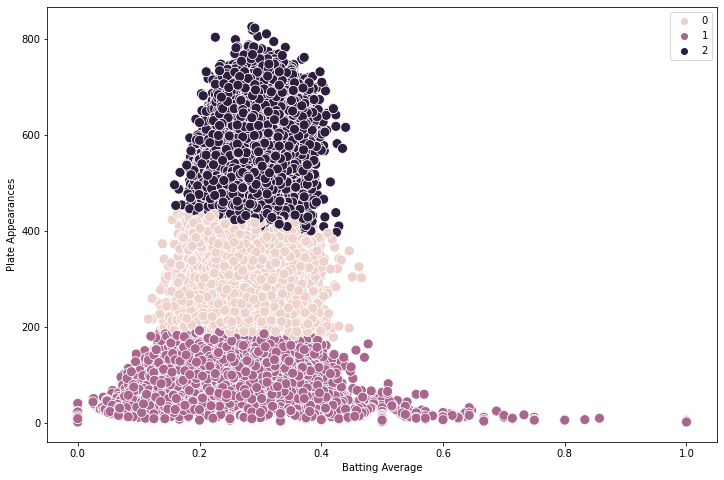

In [29]:
# Plot the clusters for the "Plate Appearances" and "Batting Average" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['Batting Average'], y=bb3['Plate Appearances'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Batting Average') # Label x-axis.
plt.ylabel('Plate Appearances') # Label y-axis.
plt.show()

#### The dark puple, or number two, cluster seems has the higher amount of values. The purple values are interesting. Either a very low or very high batting average has the lowest amount of plateapearances.

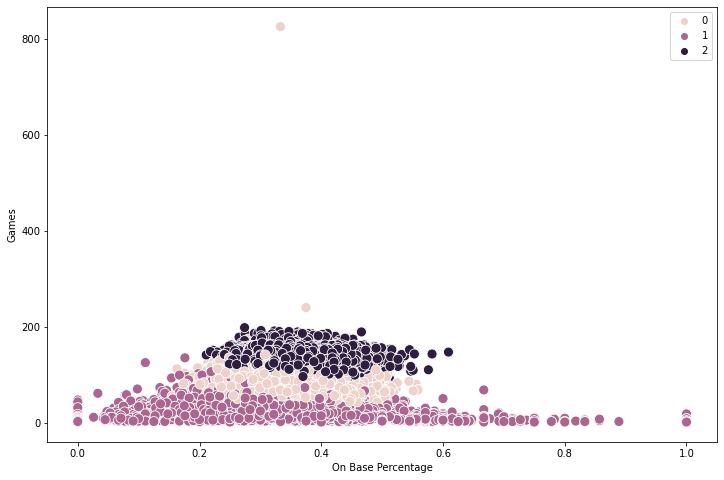

In [30]:
# Plot the clusters for the "Games" and "On Base Percentage" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['On Base Percentage'], y=bb3['Games'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('On Base Percentage') # Label x-axis.
plt.ylabel('Games') # Label y-axis.
plt.show()

#### The purple, or number one, cluster seems has the higher amount of values. The purple values are interesting. Either a very low or very high one base percentage has the lowest amount of games. The number of games increasese as batting average incrases up until about 200 games and then batting average starts to go back down. There does seem to be a potential extreme value of over 800 games. 

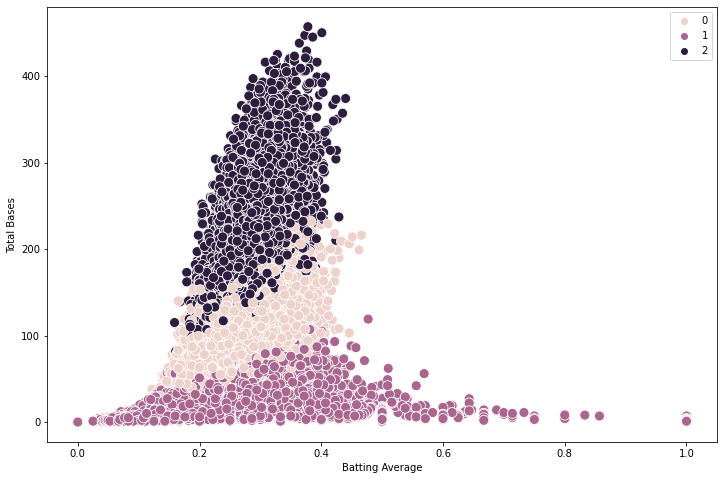

In [31]:
# Plot the clusters for the "Batting Average" and "Total Bases" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bb3['Batting Average'], y=bb3['Total Bases'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Batting Average') # Label x-axis.
plt.ylabel('Total Bases') # Label y-axis.
plt.show()

#### The dark puple, or number two, cluster seems has the higher amount of values. The purple values are interesting. Either a very low or very high batting average has the lowest amount of total bases. A batting average range of 200-400 leads to the highest amount of total bases.

#### Running some descriptive statistics using group by function

In [32]:
bb3.columns

Index(['Year', 'Games', 'Plate Appearances', 'At Bats', 'Runs', 'Hits',
       'Double', 'Triple', 'Home Run', 'Runs Batted In', 'Walk',
       'Batting Average', 'On Base Percentage', 'Slugging Percentage',
       'On Base Plus Slugging', 'Total Bases', 'clusters'],
      dtype='object')

In [33]:
bb3.loc[bb3['clusters'] == 2, 'cluster'] = 'dark purple'
bb3.loc[bb3['clusters'] == 1, 'cluster'] = 'purple'
bb3.loc[bb3['clusters'] == 0, 'cluster'] = 'pink'

#### Separate into two group by functions so it's easier to read

In [34]:
bb3.groupby('cluster').agg({'Games':['mean', 'median'], 
                         'Plate Appearances':['mean', 'median'], 
                         'Runs':['mean', 'median'],
                          'Hits':['mean', 'median'],
                          'Double':['mean', 'median'],
                          'Triple':['mean', 'median']})

Games        Plate Appearances              Runs         \
                   mean median              mean median       mean median   
cluster                                                                     
dark purple  131.409997  131.0        544.261219  538.0  72.213642   70.0   
pink          83.250251   83.0        301.675941  298.0  36.065926   35.0   
purple        25.327465   21.0         71.244207   59.0   7.816534    6.0   

                   Hits            Double           Triple         
                   mean median       mean median      mean median  
cluster                                                            
dark purple  134.801343  132.0  23.981510   23.0  4.779535    4.0  
pink          70.412322   69.0  12.500947   12.0  2.222148    2.0  
purple        15.299509   12.0   2.605613    2.0  0.465895    0.0

In [36]:
bb3.groupby('cluster').agg({'Runs Batted In':['mean', 'median'],
                          'Walk':['mean', 'median'],
                          'Batting Average':['mean', 'median'],
                          'On Base Percentage':['mean', 'median'],
                          'Total Bases':['mean', 'median']})

Runs Batted In              Walk        Batting Average         \
                      mean median       mean median            mean median   
cluster                                                                      
dark purple      65.184956   62.0  50.631854   48.0        0.279409  0.278   
pink             33.385946   32.0  27.052724   25.0        0.263015  0.261   
purple            7.108769    5.0   6.097870    4.0        0.225494  0.230   

            On Base Percentage        Total Bases         
                          mean median        mean median  
cluster                                                   
dark purple           0.350580  0.349  204.286265  198.0  
pink                  0.333631  0.332  103.899482  101.0  
purple                0.292456  0.299   21.991897   17.0

#### The dark purple cluster, or number 2 cluster, performed best in almost all of the categories. It has the highest average of runs, which is one of the most important things to have in baseball (runs). 

#### Doubles have better stats than triples. 

#### The values of the purple in each category reflect what values are the best.

#### 131 or around that number of games seems to be the best number of games to play or will lead to the highest amount of other stats (runs, walks, batting average, etc). 